In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)


In [11]:
# Load the dataset
df = pd.read_csv(r"C:\Users\avina\Downloads\Code\hearts.csv")
print("✅ Dataset Loaded Successfully!\n")
df.head()


✅ Dataset Loaded Successfully!



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
# Label encoding for categorical columns
label_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

print("✅ Categorical Columns Encoded Successfully!\n")
df.head()



✅ Categorical Columns Encoded Successfully!



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [13]:
# Independent variables (features) and target variable
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("✅ Data Split into Train and Test Sets\n")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples : {X_test.shape[0]}")



✅ Data Split into Train and Test Sets

Training Samples: 734
Testing Samples : 184


In [14]:
# Initialize and train the model
model = GaussianNB()
model.fit(X_train, y_train)

print("✅ Naive Bayes Model Trained Successfully!\n")



✅ Naive Bayes Model Trained Successfully!



In [15]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("📊 Model Evaluation Metrics:\n")
print(f"🔹 Accuracy Score : {acc:.4f}")
print(f"🔹 Precision      : {prec:.4f}")
print(f"🔹 Recall         : {rec:.4f}")
print(f"🔹 F1 Score       : {f1:.4f}")

# Classification report
print("\n📑 Classification Report:\n")
print(classification_report(y_test, y_pred))



📊 Model Evaluation Metrics:

🔹 Accuracy Score : 0.8424
🔹 Precision      : 0.8824
🔹 Recall         : 0.8411
🔹 F1 Score       : 0.8612

📑 Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



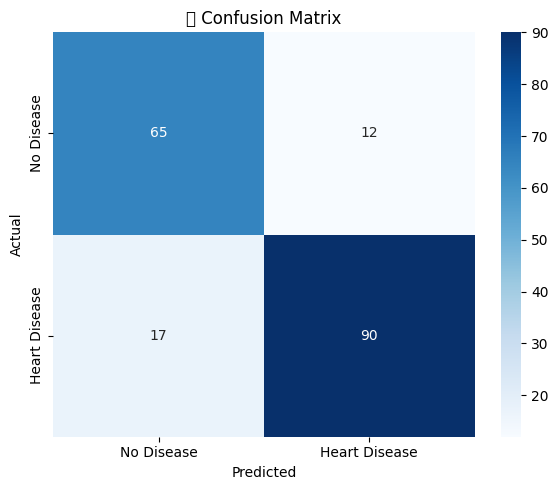

In [17]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
plt.title("💡 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



In [18]:
# Test case: format [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS,
#                    RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope]
sample_input = [[29, 0, 2, 100, 106, 1, 2, 80, 1, 1, 1]]

prediction = model.predict(sample_input)

print("\n🔍 Sample Prediction:")
if prediction[0] == 1:
    print("⚠️  The Patient **has** Heart Disease – Immediate medical consultation recommended.")
else:
    print("✅ The Patient **does not** have Heart Disease.")



🔍 Sample Prediction:
⚠️  The Patient **has** Heart Disease – Immediate medical consultation recommended.


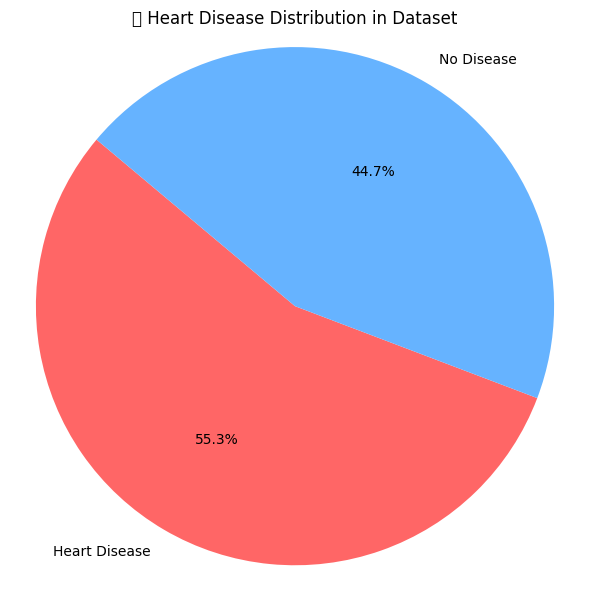

In [19]:
labels = ['Heart Disease', 'No Disease']
sizes = df['HeartDisease'].value_counts()
colors = ['#ff6666', '#66b3ff']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("💓 Heart Disease Distribution in Dataset")
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.tight_layout()
plt.show()



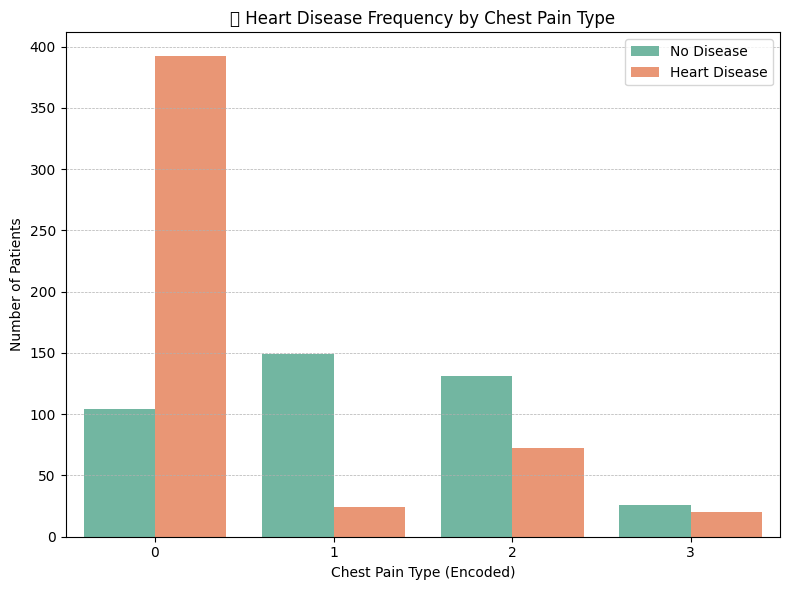

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='Set2')
plt.title("📌 Heart Disease Frequency by Chest Pain Type")
plt.xlabel("Chest Pain Type (Encoded)")
plt.ylabel("Number of Patients")
plt.legend(["No Disease", "Heart Disease"])
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


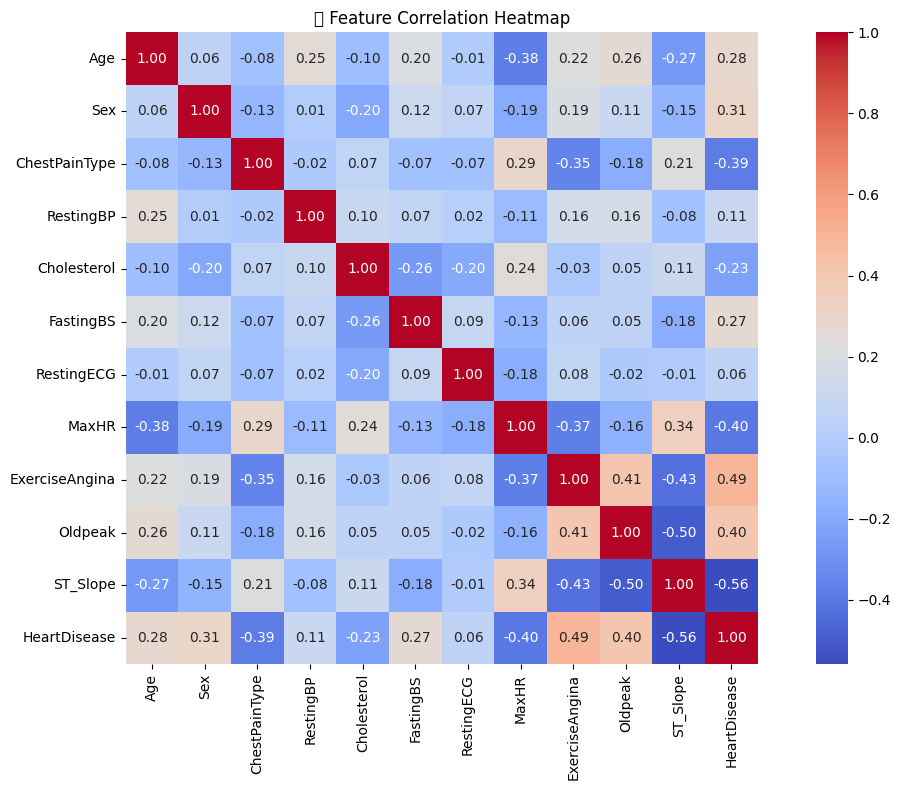

In [21]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("🔗 Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


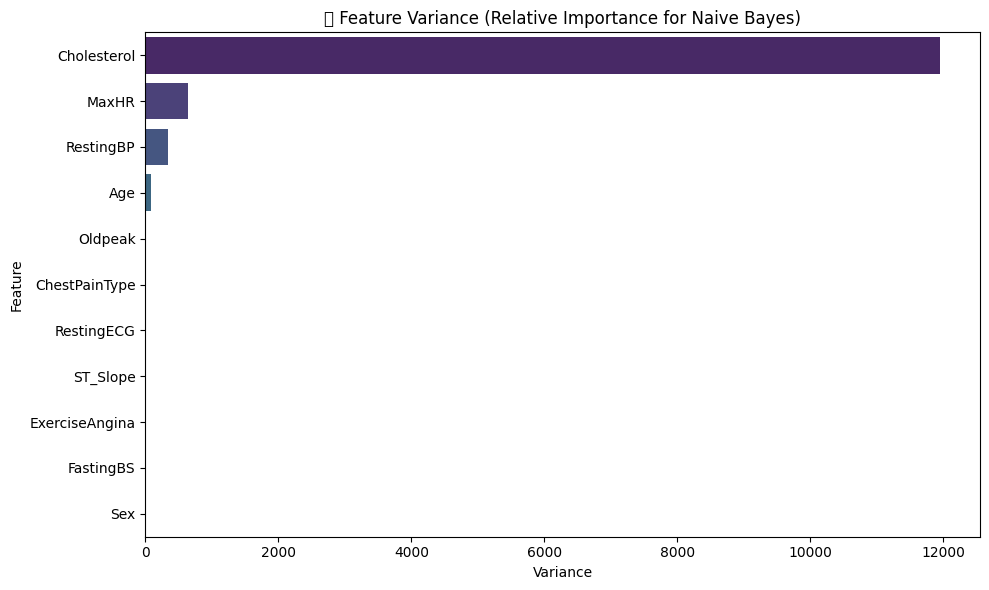

In [22]:
variances = pd.DataFrame({
    'Feature': X.columns,
    'Variance': np.var(X, axis=0)
}).sort_values(by='Variance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=variances, x='Variance', y='Feature', palette='viridis')
plt.title("⭐ Feature Variance (Relative Importance for Naive Bayes)")
plt.xlabel("Variance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


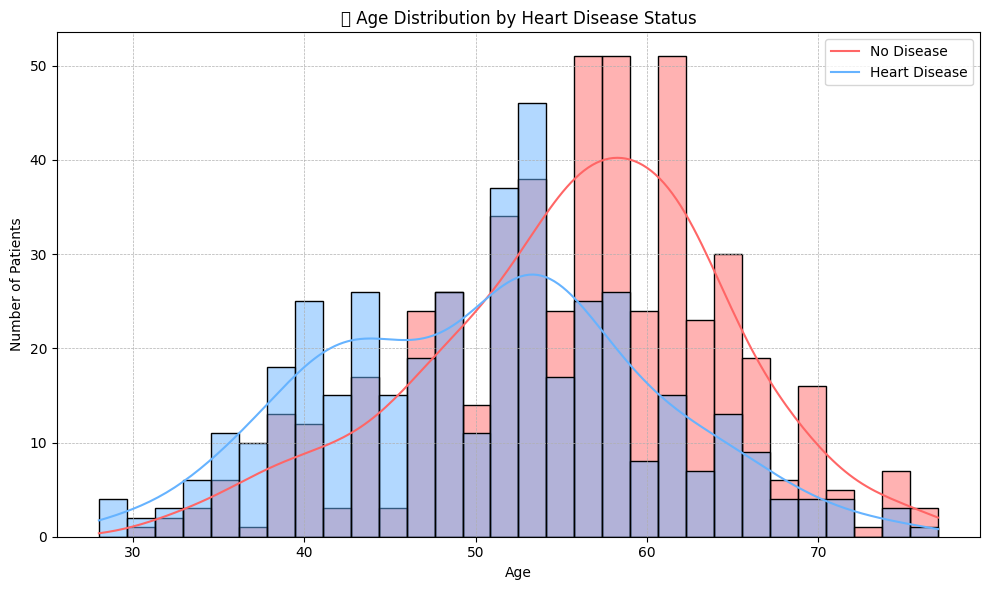

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='HeartDisease', bins=30, kde=True, palette=['#66b3ff', '#ff6666'])
plt.title("📊 Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.legend(["No Disease", "Heart Disease"])
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


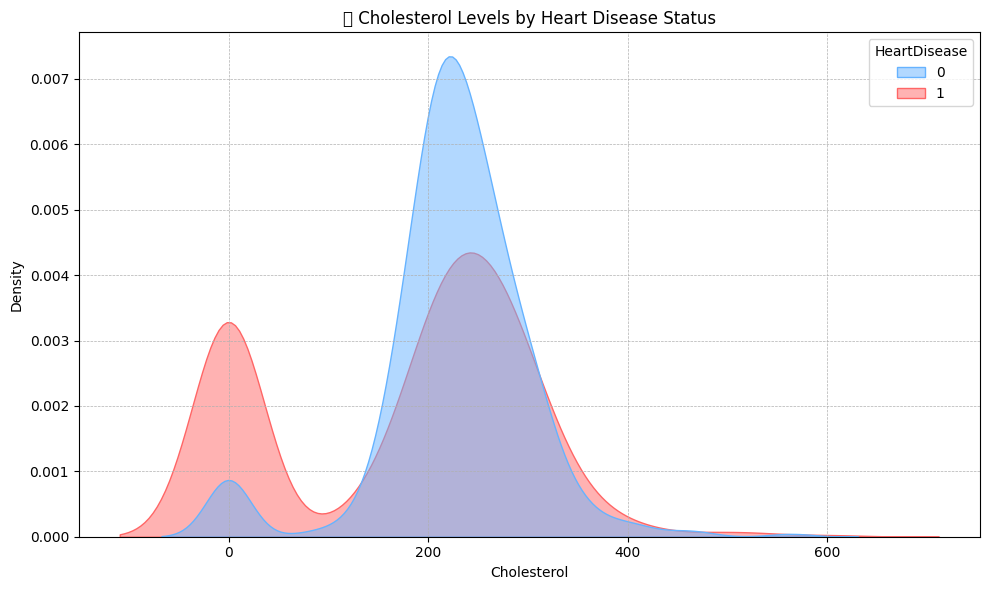

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Cholesterol', hue='HeartDisease', fill=True, common_norm=False,
            palette=['#66b3ff', '#ff6666'], alpha=0.5)
plt.title("🩸 Cholesterol Levels by Heart Disease Status")
plt.xlabel("Cholesterol")
plt.ylabel("Density")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


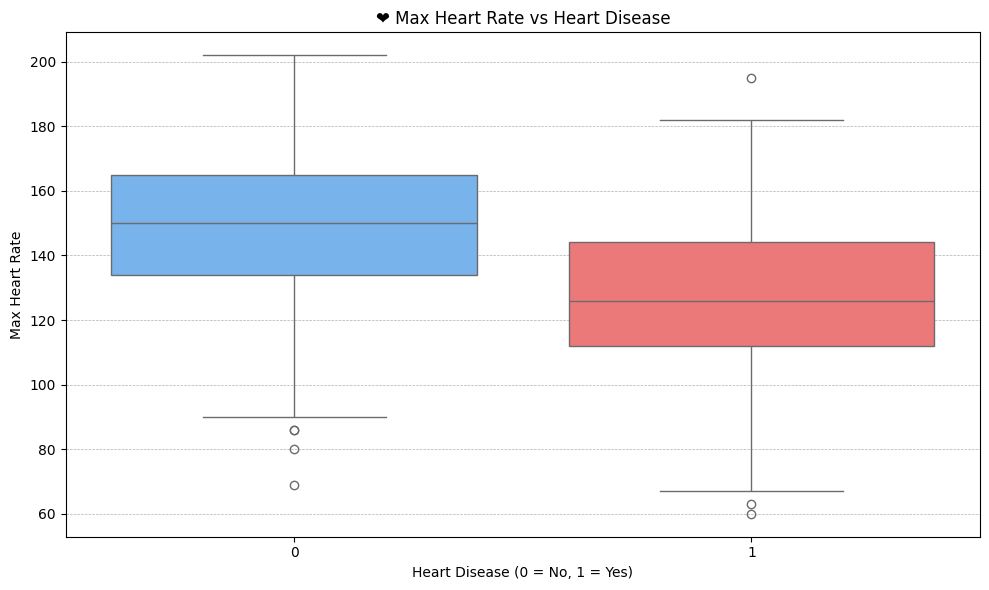

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='HeartDisease', y='MaxHR', palette=['#66b3ff', '#ff6666'])
plt.title("❤️ Max Heart Rate vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Max Heart Rate")
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


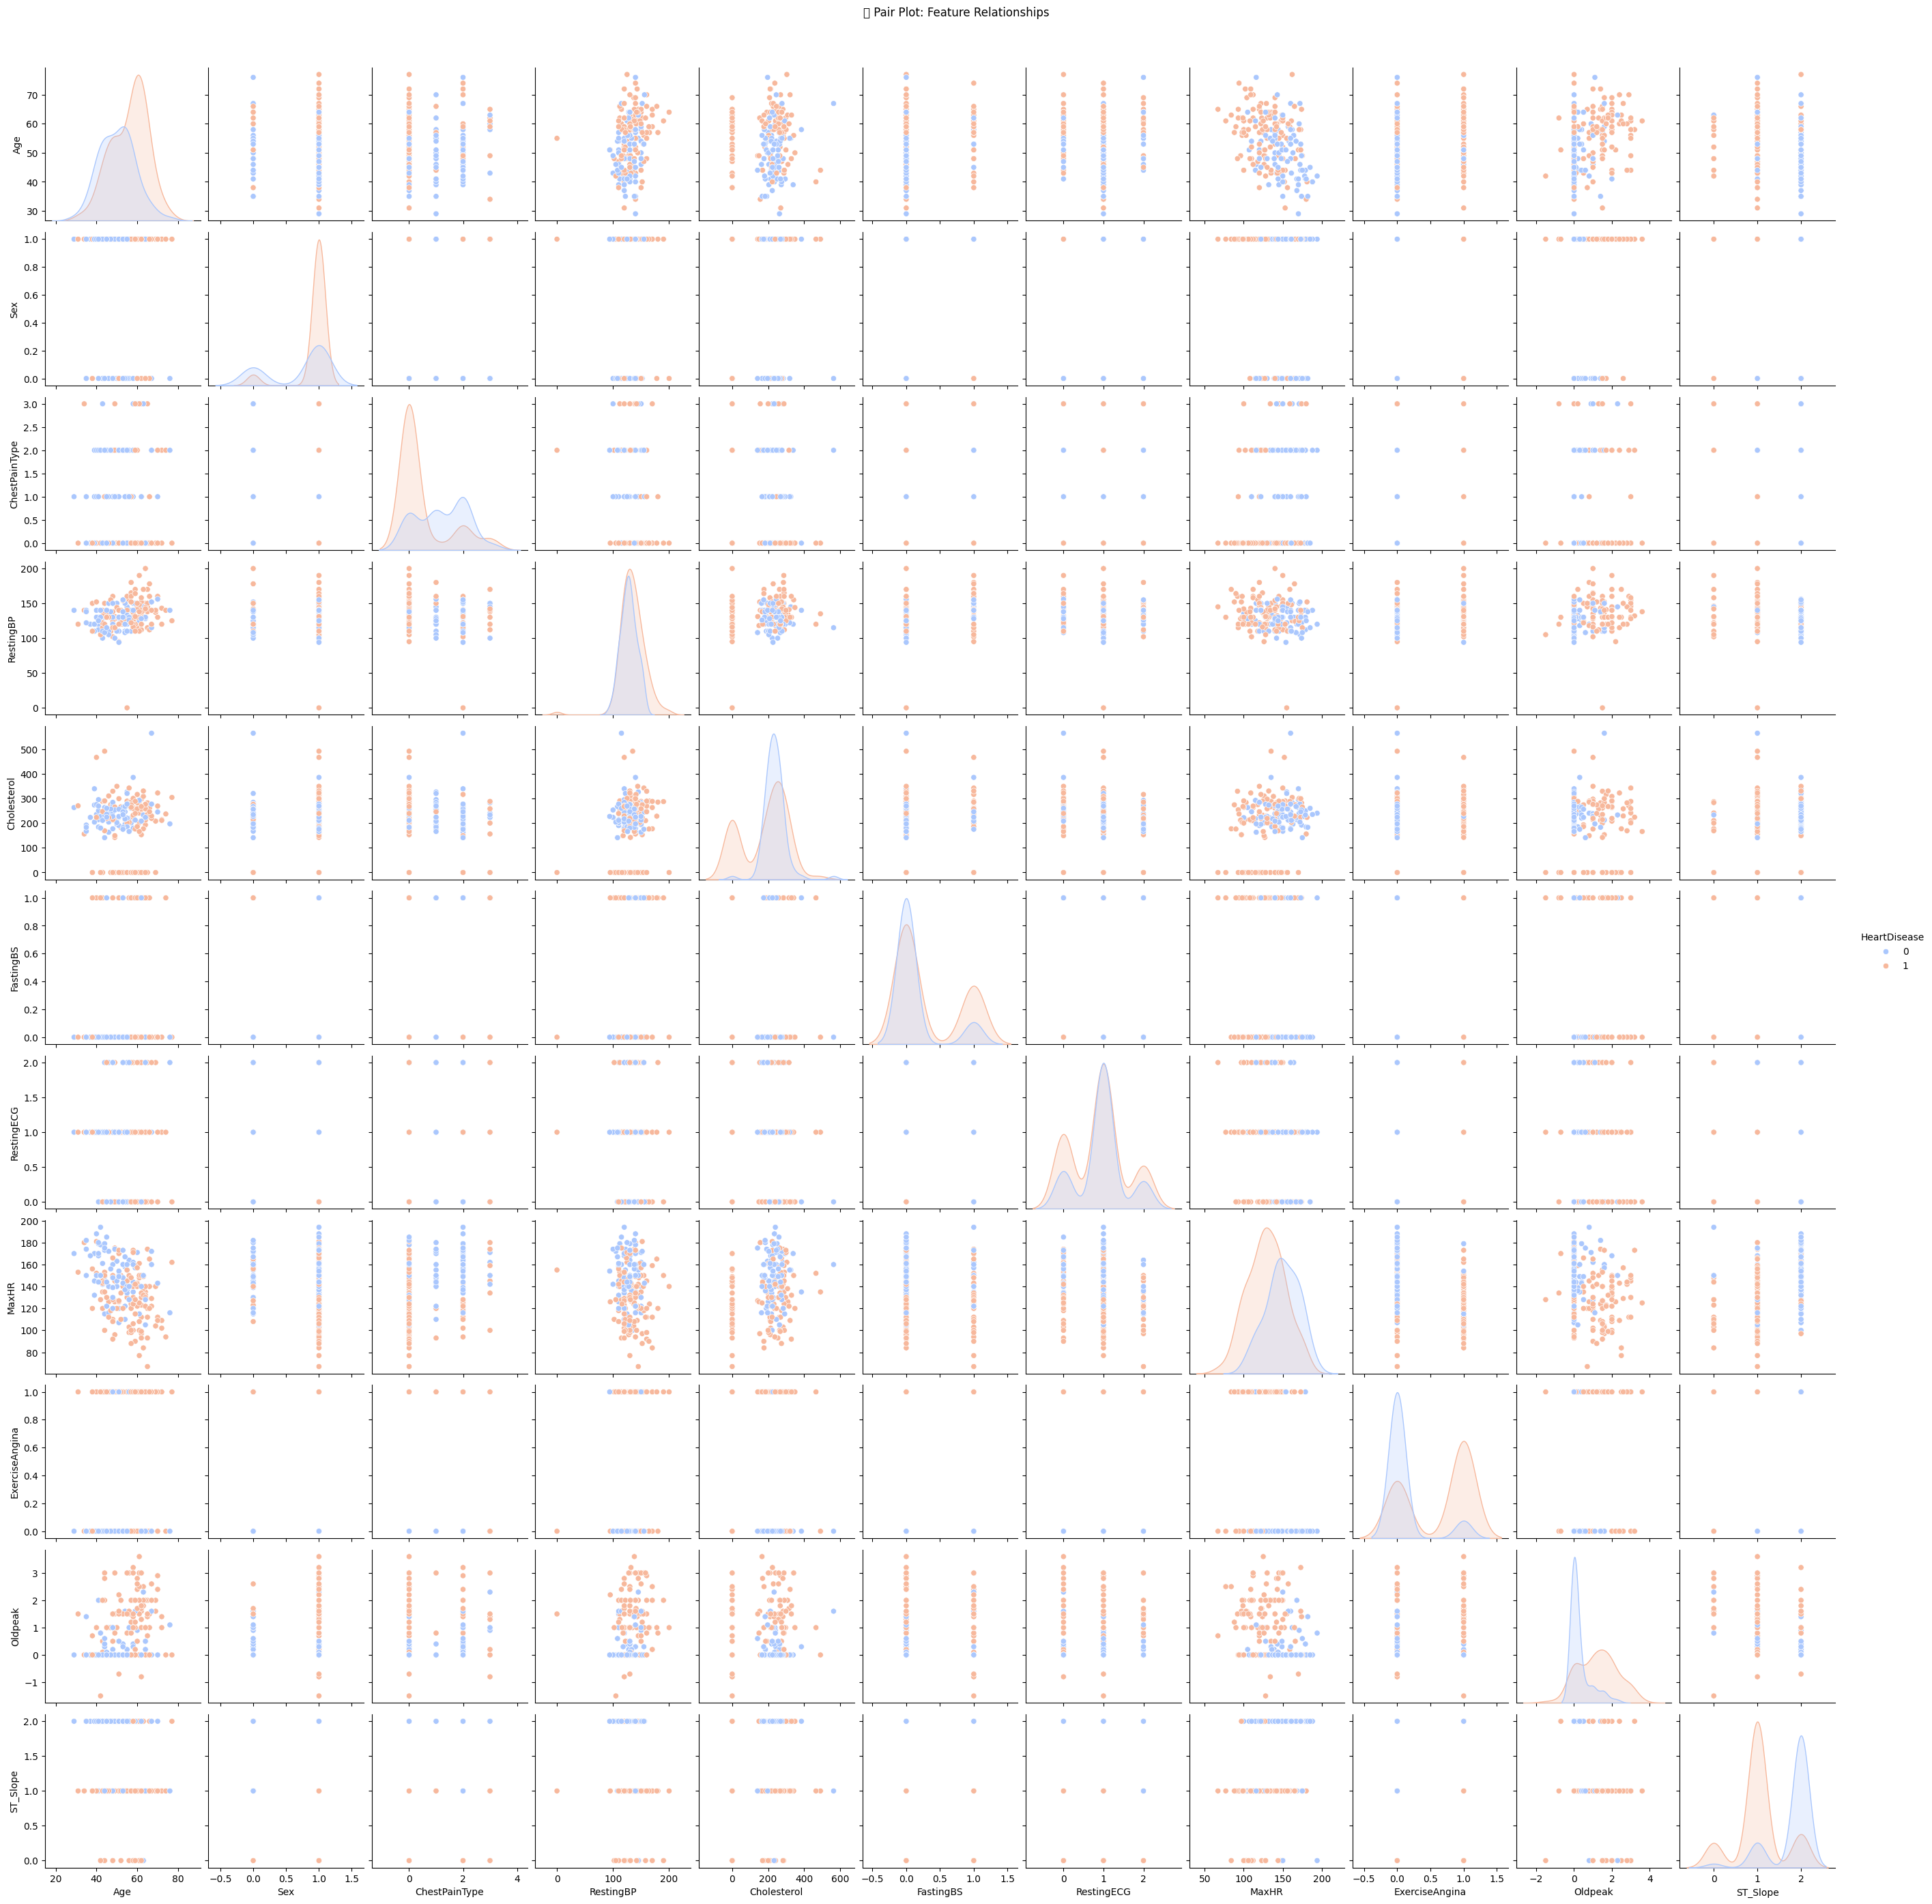

In [26]:
# This is optional: it creates plots for each feature combination
# Best used if dataset is small and for exploration
sns.pairplot(df.sample(200), hue='HeartDisease', palette='coolwarm')
plt.suptitle("🔍 Pair Plot: Feature Relationships", y=1.02)
plt.show()
